# 反投影



固定转角$\theta_k$的完整投影$g(\rho,\theta_k)$的一个点$g(\rho_j,\theta_k)$开始。
反投影这个点形成部分图像的过程是，将直线$L(\rho_j,\theta_k)$复制到图像上，直线上每点的值是$g(\rho,\theta_k)$.对投影信号所有$\rho_j$值重复这个过程可得如下表达式
$$
    f_{\theta_k}(x,y)= g(\rho,\theta_k) = g(\rho,\theta) = g(xcos\theta_k + ysin\theta_k)
$$

可把在角度$\theta$处得到的单个反投影形成的图像写为:
$$
    f_{\theta_k} = g(xcos\theta + ysin\theta,\theta)
$$

对所有反投影图像积分，得到最终图像:
$$
    f(x,y) = \int_0^{\pi}f(x,y)d\theta
$$
在离散情况下，积分变成对所有反投影图像的求和：
$$
    f(x,y) = \sum_{\theta=0}^{\pi}f_\theta(x,y)
$$

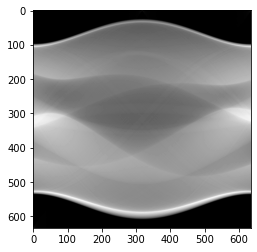

In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import cv2 
g = cv2.imread("./radon.png" ,cv2.IMREAD_GRAYSCALE)
plt.imshow(g , 'gray')

In [2]:
g = g.copy()

def row_inverse_projection_simple(g,theta):
    h,w = g.shape   
    f = np.zeros((h,w))
    for y in range(h):
        for x in range(w): 
            rho = x 
            f[y][x] = g[rho][theta]
    return f

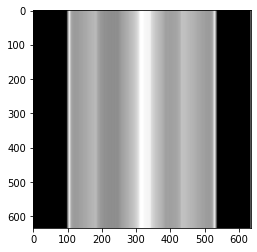

In [3]:
# 让我们先来看看固定theta为0时，复原的图像
f = row_inverse_projection_simple(g,0)
plt.imshow(f , "gray")

In [4]:
# 根据公式完成整个图像处理
def inverse_projection_simple(g):
    h,w = g.shape   
    f = np.zeros((h,w))    
    for y in range(h):
        for x in range(w):                
            for theta in range(w): 
                f[y][x]  += np.sum(row_inverse_projection_simple(g,theta))
    return f

In [5]:
f = inverse_projection_simple(g)
plt.imshow(f , "gray")

KeyboardInterrupt: 

## 傅里叶切片定理
关于$\rho$的投影的一维傅里叶变换为:
$$
    G(\omega , \theta) = \int_{-\infty}^{\infty}g(\rho,\theta)e^{(-j2\pi\omega\rho)}d\rho
$$